# **1. Developing an SVM Classifier to Classify Emails As Spam/Ham**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from collections import Counter
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from imblearn.over_sampling import SMOTE

In [2]:
# connect to Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# move into the folder containing the spam.csv dataset

%cd /content/drive/MyDrive/MLOM/Assignment02

/content/drive/MyDrive/MLOM/Assignment02


In [4]:
# import the spam.csv dataset into a dataframe using pandas library

data = pd.read_csv('spam.csv')
data.head()

,Label,EmailText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
# get a summary of the dataset content

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Label      5572 non-null   object
 1   EmailText  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
# find the most common words in span and ham emails

count1 = Counter(" ".join(data[data['Label']=='ham']["EmailText"]).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in ham", 1 : "count"})
count2 = Counter(" ".join(data[data['Label']=='spam']["EmailText"]).split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in spam", 1 : "count_"})

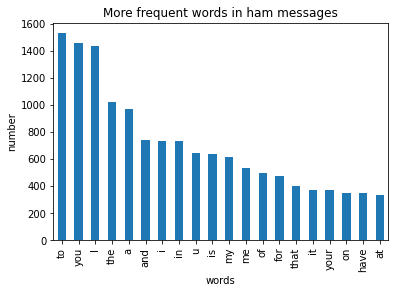

In [7]:
# plot a bar graph depicting the most common words in ham emails

df1.plot.bar(legend = False)
y_pos = np.arange(len(df1["words in ham"]))
plt.xticks(y_pos, df1["words in ham"])
plt.title('More frequent words in ham messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

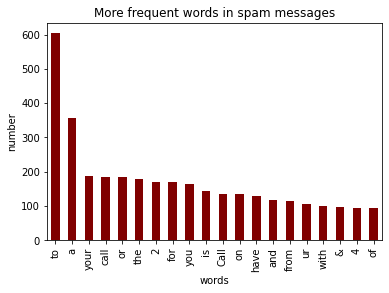

In [8]:
# plot a bar graph depicting the most common words in spam emails

df2.plot.bar(legend = False, color = 'maroon')
y_pos = np.arange(len(df2["words in spam"]))
plt.xticks(y_pos, df2["words in spam"])
plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

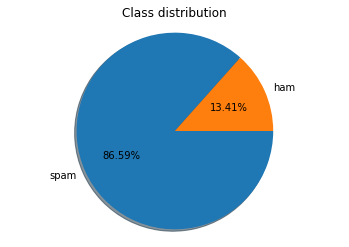

No. of samples associated with label spam: 747
No. samples associated with lable ham: 4825


In [9]:
# target class distribution

class_occur = data['Label'].value_counts()
class_names = ['spam','ham']
fig, ax = plt.subplots()
ax.pie(class_occur, labels=class_names, autopct='%1.2f%%',
        shadow=True, startangle=0, counterclock=False)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Class distribution')
plt.show()
print("No. of samples associated with label spam: {}".format(class_occur['spam']))
print("No. samples associated with lable ham: {}".format(class_occur['ham']))

***As shown in the above results, there is an imbalance in the target class distribution of the dataset which needs to be handled.***

In [10]:
# split the dataset into independent(EmailText) & dependent(Label) - X being the independent variable and y being the dependent variable

X = data['EmailText'].values
y = data['Label'].values

# print(X)
# print(y)

In [11]:
# splitting the dataset into training(80%) and testing data(20%)
# random state is set to zero to get the same train and test sets across different executions.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

In [12]:
# Converting string data into integer values
# CountVectorizer is a tool provided by the scikit-learn library to convert a collection of text documents to a matrix of token counts

cv = CountVectorizer() 
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

In [13]:
# X_train=X_train.toarray()
# X_test=X_test.toarray()

In [14]:
# handling the imbalance in the target class using SMOTE
# SMOTE is an oversampling technique that will synthesize new minority instances between existing minority instances to eliminate the target class imbalance

x_train = pd.DataFrame(X_train)
X_resample, y_resampled = SMOTE().fit_resample(X_train, y_train)

In [15]:
# fit the Support Vector Classifier for the training data
# 'rbf' was selected as the kernal as it is one of the most suitable kernels for binary classifications

from sklearn.svm import SVC
SVM_classifier = SVC(C=1, kernel = 'rbf', random_state = 0)
SVM_classifier.fit(X_resample, y_resampled)

SVC(C=1, random_state=0)

In [16]:
# predict the label value for the testing dataset

y_pred=SVM_classifier.predict(X_test)

In [17]:
# get the testing accuracy by comparing the predicted output with the actual output of the training dataset

accuracy_score(y_test,y_pred)

0.9327354260089686

In [18]:
# get the confusion matrix by comparing the predicted output with the actual output of the training dataset

confusion_matrix(y_test,y_pred)

array([[900,  49],
       [ 26, 140]])

***Confusion matrix shows that the number of true positives and true negatives are much higher than the number of false positives and false negatives. Therefore we can assume our classifier is good.***

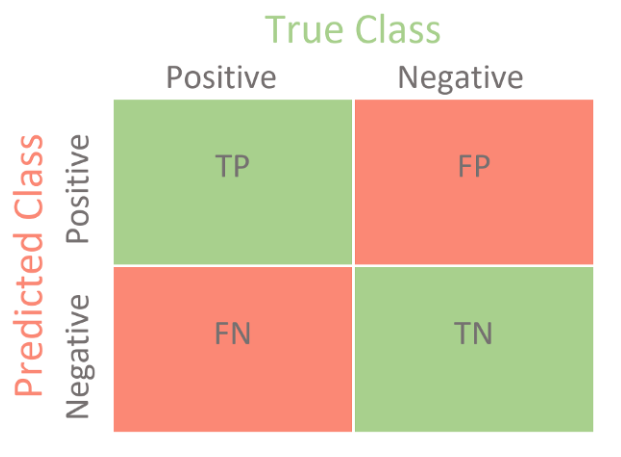

In [19]:
# print a classification report for the SVM classifier

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.97      0.95      0.96       949
        spam       0.74      0.84      0.79       166

    accuracy                           0.93      1115
   macro avg       0.86      0.90      0.87      1115
weighted avg       0.94      0.93      0.93      1115





---



# **2. Increasing the Accuracy of the Classifier**

In [20]:
# technique used to increase accuracy - Cross Validation
# Cross-validated model building is an excellent method to create machine learning applications with greater accuracy or performance
# Additionally the kernal was also changed to 'linear' in order to obtain a better accuracy

from sklearn.model_selection import cross_val_score
SVM_classifier = svm.SVC(kernel='linear', C=1, random_state=0)
SVM_classifier.fit(X_resample, y_resampled)
scores = cross_val_score(SVM_classifier, X_resample, y_resampled, cv=5)
scores

print(np.mean(scores))

0.9539513737235084


***As shown, the accuracy has increased from approximately 93% to a value above 95% by the techniques used above***



---


# **3. Predicting Whether the Given Emails are Spam/Ham Using the Trained Model.**

In [21]:
# assign the emails into separate variables

e1 = ('Hey, you have won a car !!!!. Conrgratzz')
e2 = ('Dear applicant, Your CV has been recieved. Best regards')
e3 = ('You have received $1000000 to your account')
e4 = ('Join with our whatsapp group')
e5 = ('Kindly check the previous email. Kind Regards')

In [22]:
# predict if the above emails are spam/ham
# the email text should be passed through CountVectorizer, to be converted into to a matrix of token counts, before using for the prediction
# once converted into a matrix of token counts, they can be classified as spam/ham emails by using the above trained model(SVM_classifier)

e1 = cv.transform([e1])
print('email1: ', SVM_classifier.predict(e1))

e2 = cv.transform([e2])
print('email2: ', SVM_classifier.predict(e2))

e3 = cv.transform([e3])
print('email3: ', SVM_classifier.predict(e3))

e4 = cv.transform([e4])
print('email4: ', SVM_classifier.predict(e4))

e5 = cv.transform([e5])
print('email5: ', SVM_classifier.predict(e5))

email1:  ['spam']
email2:  ['ham']
email3:  ['spam']
email4:  ['spam']
email5:  ['ham']


***The results obtained from the prediction show that 3/5 of the given emails are spam and 2/5 emails are ham.***


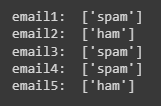



---

